In [1]:
import pandas as pd
import numpy as np
import string

# store models
import pickle
from sklearn.pipeline import Pipeline

# text preprocessing
import nltk
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import re
from emot.emo_unicode import EMOTICONS_EMO, UNICODE_EMOJI

# plots and metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
%matplotlib inline

file1 = "../dataset/Amazon/software/98_06.csv"
file2 = "../dataset/Amazon/software/07_12.csv"
file3 = "../dataset/Amazon/software/13_17.csv"
file4 = "../dataset/Amazon/software/18.csv"

In [2]:
df1 = pd.read_csv(file4,usecols=['overall', 'reviewTime','reviewText'])

In [11]:
def readcsv1(file):
    df = pd.read_csv(file,usecols=['overall', 'reviewTime','reviewText'])

    data_analysis = df.head(), df.info(), df.describe(), df.isnull().sum(), df.notnull().all()
    
    hist = df.hist(bins=50, figsize=(20,15)), plt.show()
    
    overall = print('Negative', round(df['overall'].value_counts()[-1]/len(df) * 100,2), '% of the dataset'),"\n", 
    print('Neutral', round(df['overall'].value_counts()[0]/len(df) * 100,2), '% of the dataset'),"\n", 
    print('Positive', round(df['overall'].value_counts()[1]/len(df) * 100,2), '% of the dataset'),"\n",
    print('Redundant Data', df.duplicated('reviewText').sum())
   
    return data_analysis


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253161 entries, 0 to 253160
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   overall     253161 non-null  float64
 1   reviewTime  253161 non-null  int64  
 2   reviewText  253147 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 5.8+ MB


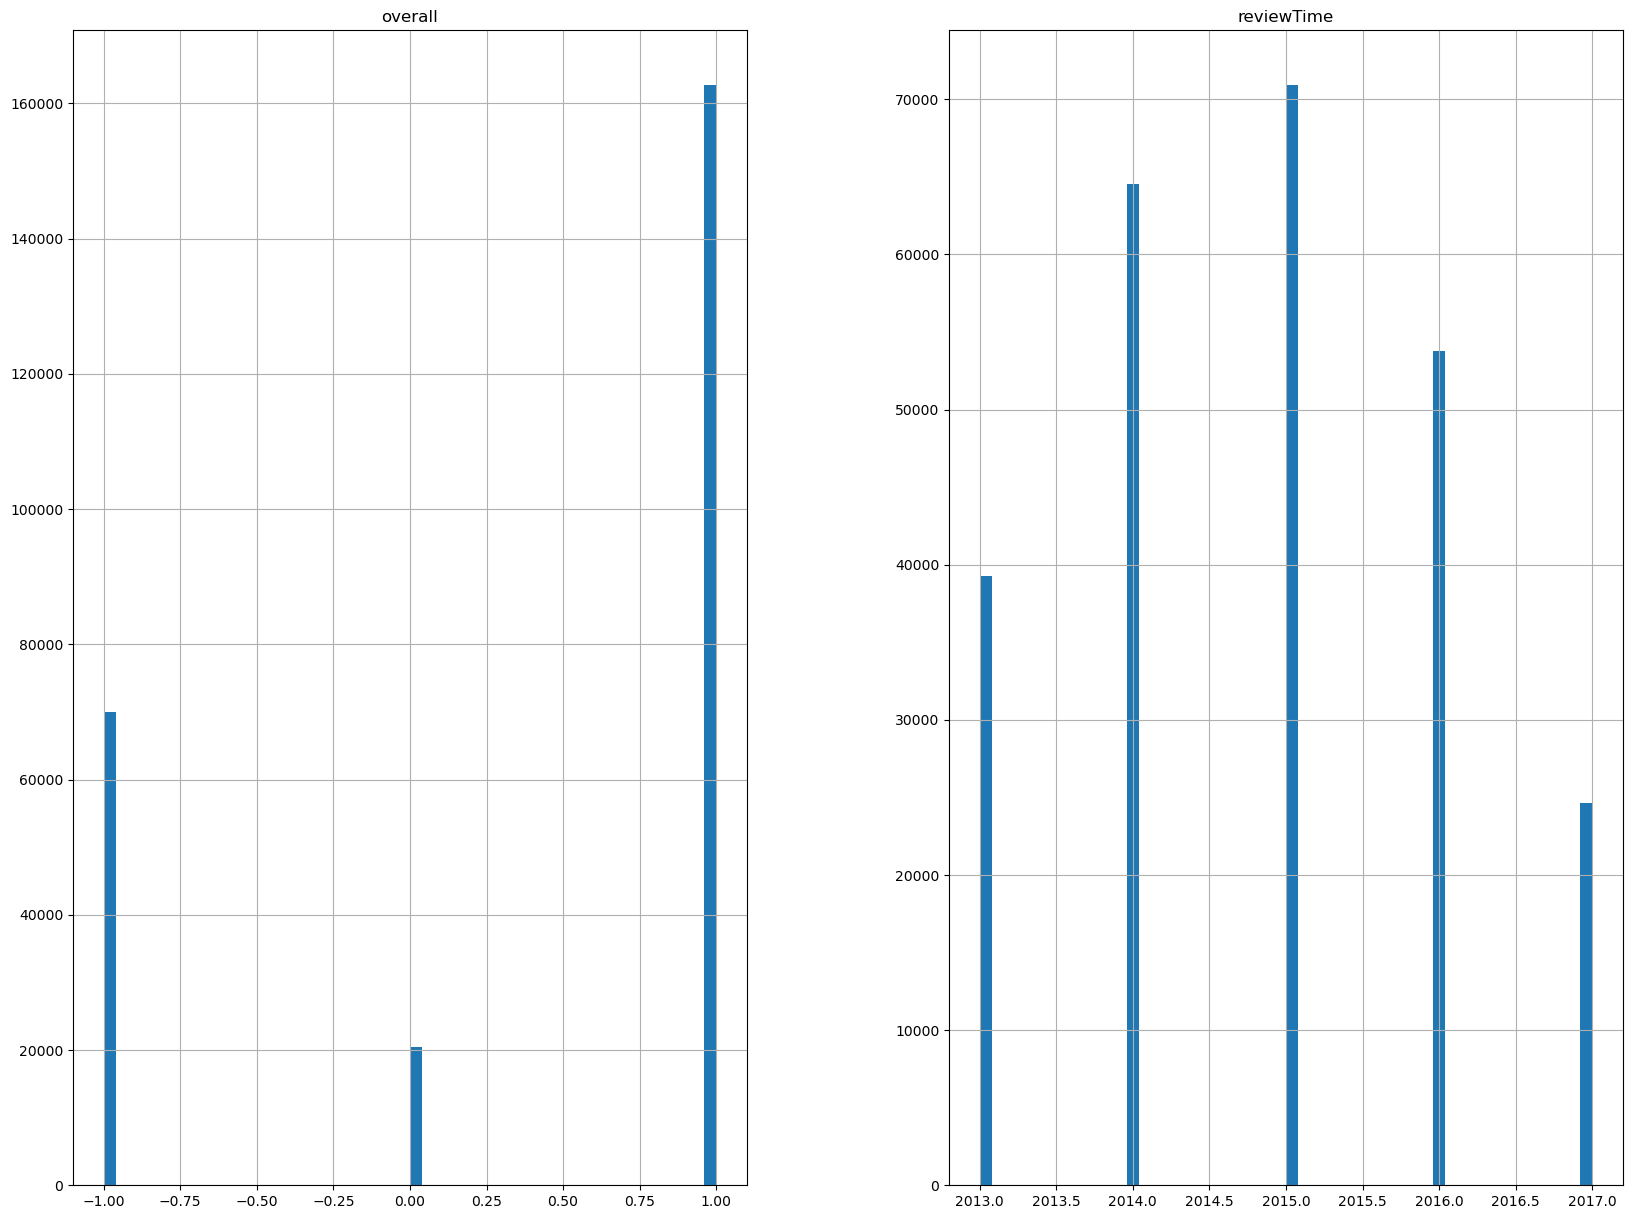

Negative 27.65 % of the dataset
Neutral 8.09 % of the dataset
Positive 64.26 % of the dataset
Redundant Data 18140


(   overall  reviewTime                                         reviewText
 0      1.0        2014  The materials arrived early and were in excell...
 1      1.0        2014  I am really enjoying this book with the worksh...
 2     -1.0        2014  IF YOU ARE TAKING THIS CLASS DON"T WASTE YOUR ...
 3      0.0        2014  This book was missing pages!!! Important pages...
 4      1.0        2013  I have used LearnSmart and can officially say ...,
 None,
              overall     reviewTime
 count  253161.000000  253161.000000
 mean        0.366071    2014.841879
 std         0.886062       1.205308
 min        -1.000000    2013.000000
 25%        -1.000000    2014.000000
 50%         1.000000    2015.000000
 75%         1.000000    2016.000000
 max         1.000000    2017.000000,
 overall        0
 reviewTime     0
 reviewText    14
 dtype: int64,
 overall        True
 reviewTime     True
 reviewText    False
 dtype: bool)

In [29]:
readcsv1(file3)

In [35]:
# Calculate and print statistics for each numeric attribute
for col in df1.select_dtypes(include=['number']).columns:
    print(f"Statistics for {col}:")
    print(df1[col].describe()[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']])
    print("\n" + "-"*40 + "\n")

# Analyze text column 'reviewText' if it exists
if 'reviewText' in df1.columns:
    print("Statistics for reviewText:")
    print(f"Count: {df1['reviewText'].count()}")
    print(f"Unique: {df1['reviewText'].nunique()}")
    print(f"Average Length: {df1['reviewText'].apply(lambda x: len(str(x))).mean():.2f} characters")
    print("\n" + "-"*40 + "\n")

Statistics for overall:
count    11114.000000
mean         0.249235
std          0.930096
min         -1.000000
25%         -1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: overall, dtype: float64

----------------------------------------

Statistics for reviewTime:
count    11114.0
mean      2018.0
std          0.0
min       2018.0
25%       2018.0
50%       2018.0
75%       2018.0
max       2018.0
Name: reviewTime, dtype: float64

----------------------------------------

Statistics for reviewText:
Count: 11114
Unique: 10435
Average Length: 178.08 characters

----------------------------------------



In [72]:
amazon = pd.read_csv(file3,usecols=['overall', 'reviewTime','reviewText'])

In [73]:
amazon.head()

,overall,reviewTime,reviewText
0,1.0,2014,The materials arrived early and were in excell...
1,1.0,2014,I am really enjoying this book with the worksh...
2,-1.0,2014,"IF YOU ARE TAKING THIS CLASS DON""T WASTE YOUR ..."
3,0.0,2014,This book was missing pages!!! Important pages...
4,1.0,2013,I have used LearnSmart and can officially say ...


In [74]:
amazon.describe()

,overall,reviewTime
count,253161.000000,253161.000000
mean,0.366071,2014.841879
std,0.886062,1.205308
min,-1.000000,2013.000000
25%,-1.000000,2014.000000
50%,1.000000,2015.000000
75%,1.000000,2016.000000
max,1.000000,2017.000000


In [75]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253161 entries, 0 to 253160
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   overall     253161 non-null  float64
 1   reviewTime  253161 non-null  int64  
 2   reviewText  253147 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 5.8+ MB


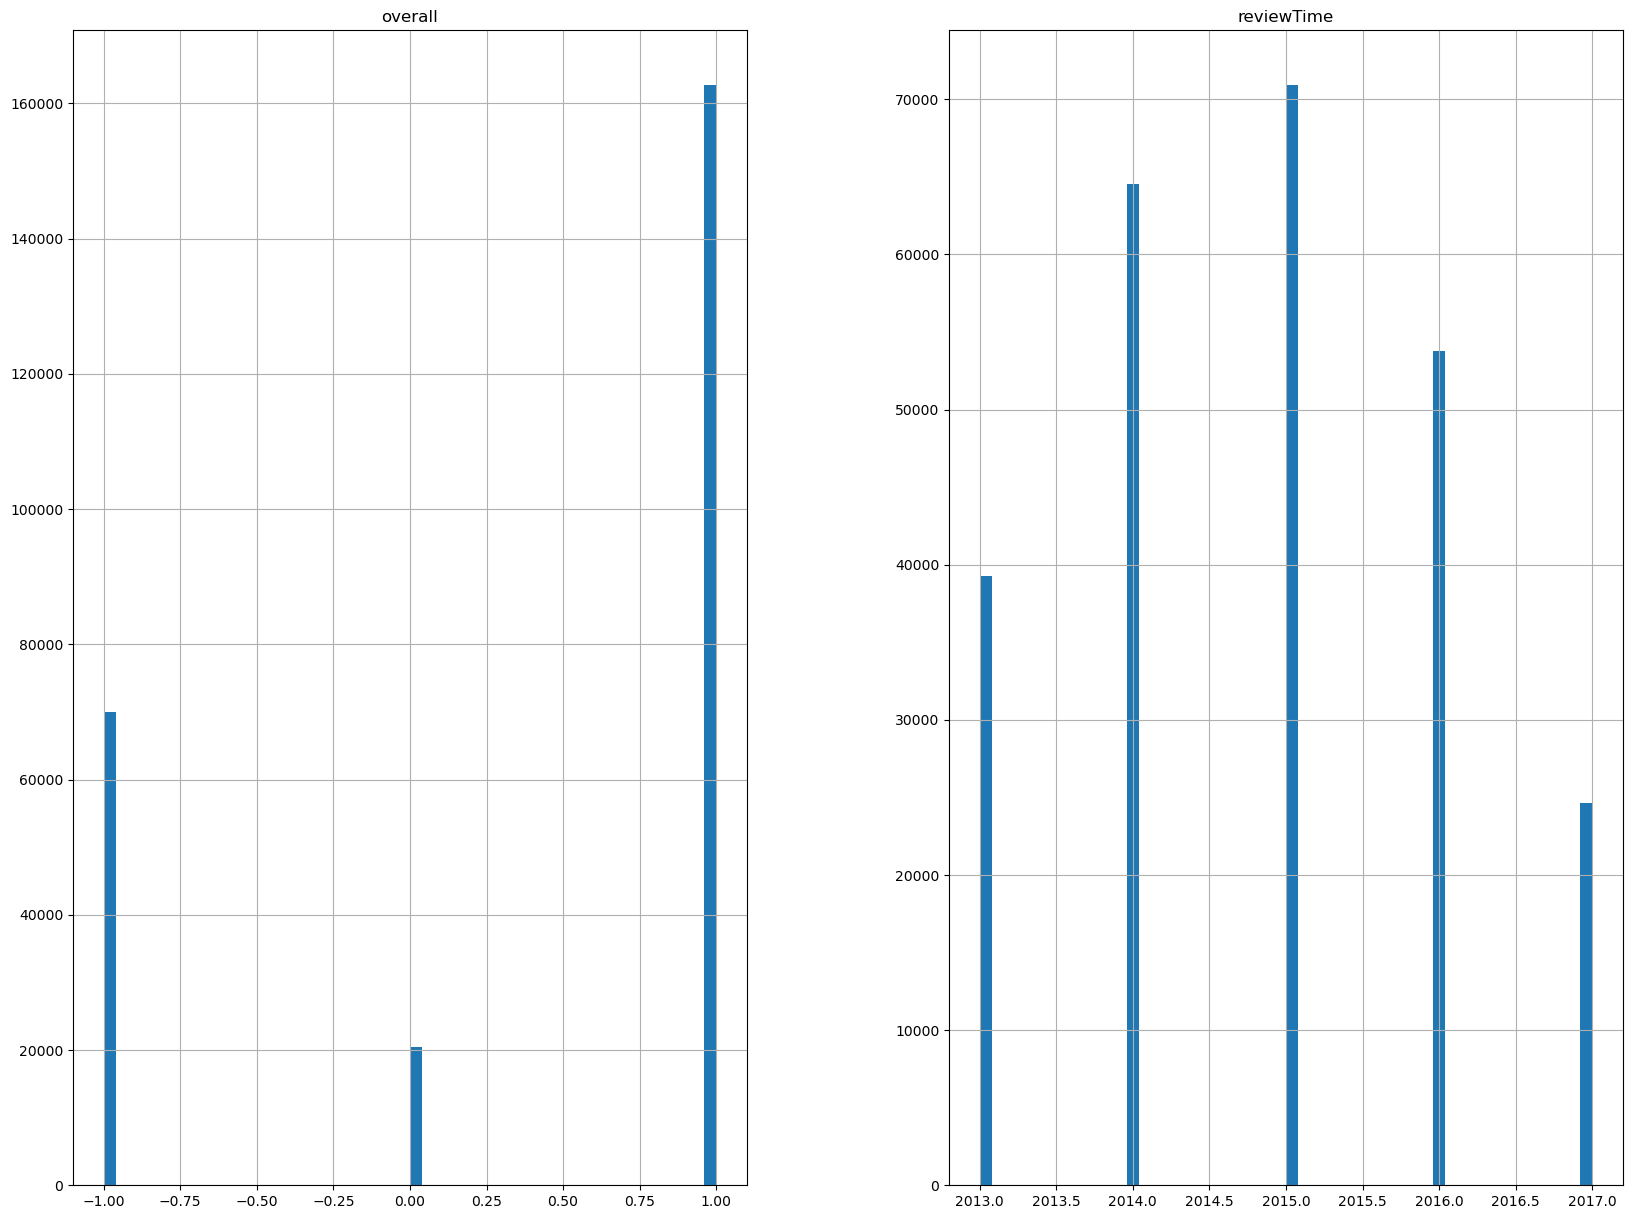

In [76]:
amazon.hist(bins=50, figsize=(20,15))
plt.show()

In [77]:
print('Negative', round(amazon['overall'].value_counts()[-1]/len(amazon) * 100,2), '% of the dataset')
print('Neutral', round(amazon['overall'].value_counts()[0]/len(amazon) * 100,2), '% of the dataset')
print('Positive', round(amazon['overall'].value_counts()[1]/len(amazon) * 100,2), '% of the dataset')

Negative 27.65 % of the dataset
Neutral 8.09 % of the dataset
Positive 64.26 % of the dataset


In [78]:
amazon.isnull().sum()

overall        0
reviewTime     0
reviewText    14
dtype: int64

In [79]:
amazon.notnull().all()

overall        True
reviewTime     True
reviewText    False
dtype: bool